# Histogram Equalization

In [1]:
# Histogram Equalization is an image processing technique that enhances the image contrast USING THE IMAGE's HISTOGRAM.
# We stretch the histogram more to the left (Dark) and right (bright) side.

# Part 1

In [2]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

(2160, 3840, 3)


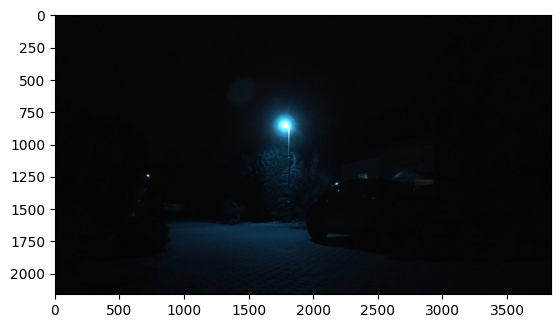

In [3]:
# We can load the image and turn it to gray scale or we can specify the "0" to do that too.
img = cv2.imread('darked_street.jpg')
# Shape of the image has 3 color channels.
print(img.shape)
plt.imshow(img, cmap='gray')

(2160, 3840)


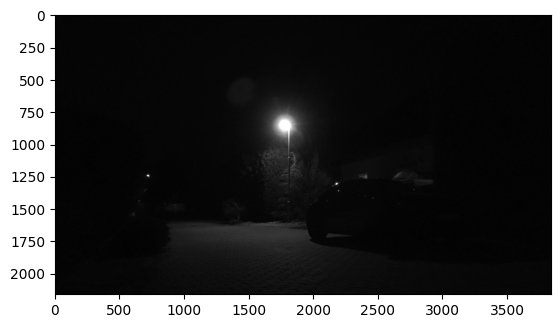

In [4]:
# We can load the image and turn it to gray scale or we can specify the "0" to do that too.
img = cv2.imread('darked_street.jpg', 0)
# We see that the shape has only one color channel now.
print(img.shape)
plt.imshow(img, cmap='gray')

# Part 2: Histogram

In [5]:
# This converts the image matrix into a vector.
# We do this because the hist function takes in a vector.
img.flatten()

array([6, 6, 6, ..., 6, 6, 6], dtype=uint8)

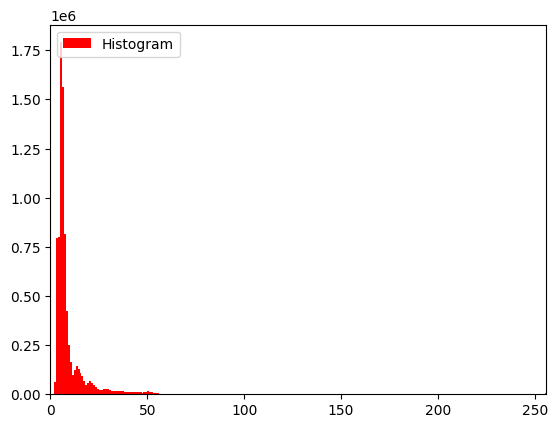

In [6]:
# Compute the histogram of the image
# 256 is the # of bins.
# We want 256 bins because we want a bin for every color intensity.
# [0, 256] is the range of the histogram.
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(['Histogram'], loc='upper left')
plt.show()

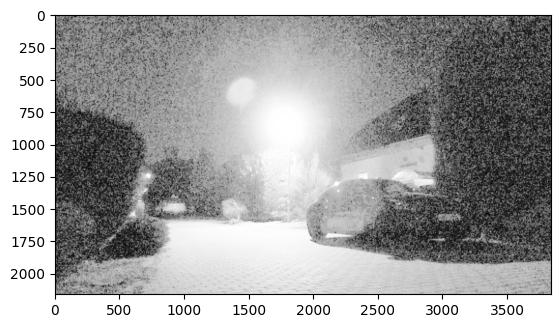

In [7]:
# This equalizeHist function equalized the images using the histogram.
equalized_img = cv2.equalizeHist(img)
plt.imshow(equalized_img, cmap='gray')

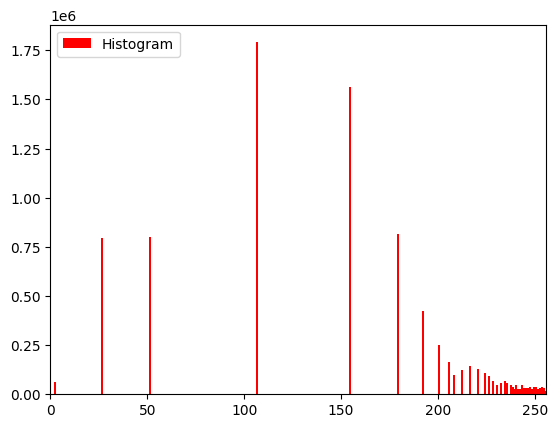

In [12]:
# Compute the histogram of the EQUALIZED image
# 256 is the # of bins.
# We want 256 bins because we want a bin for every color intensity.
# [0, 256] is the range of the histogram.
plt.hist(equalized_img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(['Histogram'], loc='upper left')
plt.show()

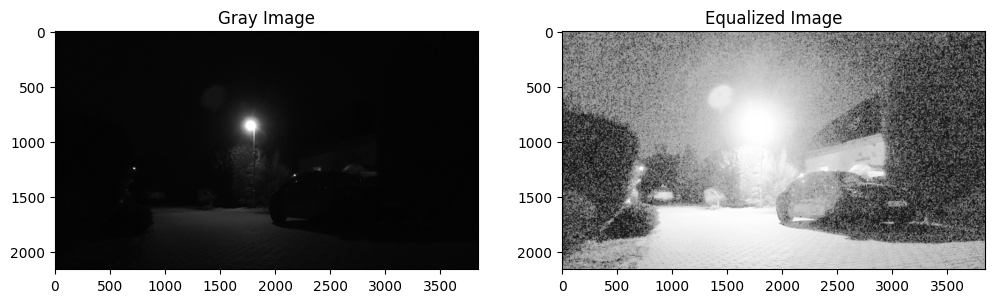

In [8]:
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

axis[0].imshow(img, cmap='gray')
axis[0].set_title('Gray Image')

axis[1].imshow(equalized_img, cmap='gray')
axis[1].set_title('Equalized Image')

plt.show()

# Using the rembg library to remove image backgrounds.

In [13]:
 pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.4 MB/s eta 0:00:00


In [16]:
# The rembg library is used for removing backgrounds from images.
# It provides a Python interface to the Rembg API, which is a tool for background removal
# powered by deep learning techniques. With this library, you can programmatically
# remove backgrounds from images using simple Python code.

from rembg import remove

(787, 1400, 3)


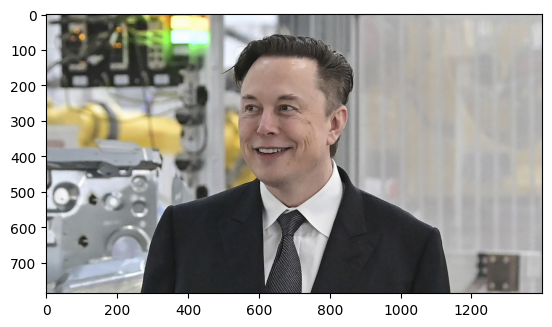

In [15]:
# read the image
img1 = cv2.imread("elon.jpg")

# turn the image from BGR to RGB
rgb_img=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

# print the image shape
print(rgb_img.shape)

# print the image
plt.imshow(rgb_img)

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 82.3GB/s]


(787, 1400, 4)


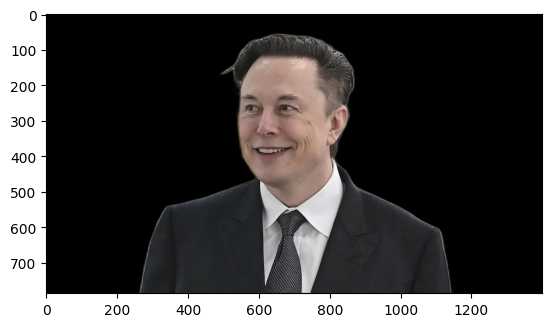

In [17]:
# Removing the background from the given Image
cropped_img = remove(rgb_img)

# print the image shape
print(cropped_img.shape)


# This line ensures that the image only retains the first three channels (Red, Green, Blue).
# In some cases, the output of the background removal process might include additional channels
# (e.g., alpha channel for transparency), but here, it seems like we're interested only in the RGB channels.
cropped_img = cropped_img[:, :, :3]

# Show the image
plt.imshow(cropped_img)

# We also notice that both images still have the same shape, because removing the background shouln't change the image size.
# But we do have one additional channel.

(787, 1400, 3)


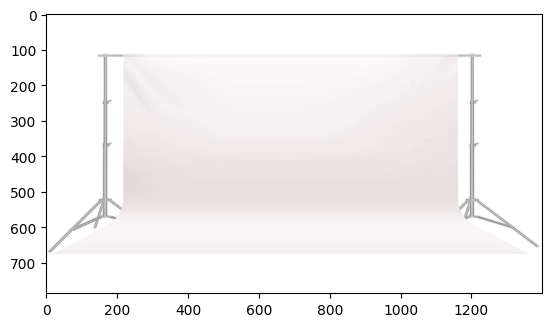

In [18]:
# Read the billboard image.
img2 = cv2.imread("billboard.jpeg")

# Make sure cropped_img and img2 have the same dimensions before blending.
img2 = cv2.resize(img2, (rgb_img.shape[1], rgb_img.shape[0]))

plt.imshow(img2)
print(img2.shape)

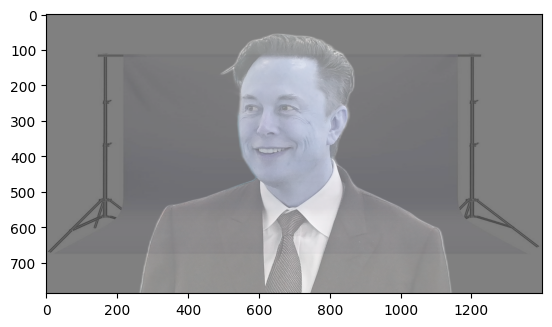

In [19]:
# Blend the images using alpha blending
result = cv2.addWeighted(cropped_img, 0.5, img2, 0.5, 0)

# Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.show()

## Part 3: Motion Detection in a video

In [9]:
import cv2
import matplotlib.pyplot as plt

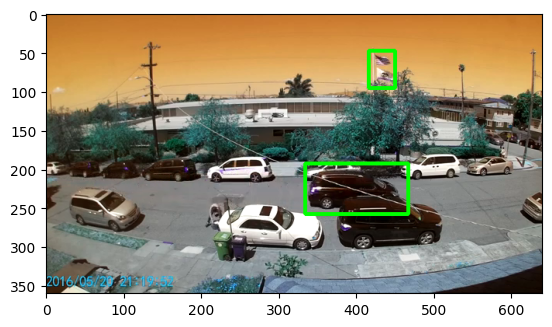

In [11]:
# read the video
cap = cv2.VideoCapture('road.mp4')

while cap.isOpened():
  # We read 2 frames because we want to know if some objects (pixels) change in the video.
  # The changed pixels will mean that the object is moving.
  ret, frame1 = cap.read()
  ret, frame2 = cap.read()

  # if there are no frames left (we finished the video)
  # return false. so we break
  if not ret:
    break

  # We get the difference from the 2 frames.
  # We use absolute difference so that there are no -ve values
  diff = cv2.absdiff(frame1, frame2)

  img = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
  plt.imshow(img, cmap='gray')


  # A countour is a whole object
  # Unlike in edge detection, where we detect edges only,
  # or in corner detection where we detect corners only.
  # Using contours we detect whole objects in the image.
  contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)

    # if the contour (object) area is less than 800 then skip and dont
    # draw a rectangle on it
    if cv2.contourArea(contour) < 800:
      continue


    # (0, 255, 0) is the rectangle color
    # 3 is the rectangle thickness
    cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 3)
    plt.imshow(frame1)


cv2.destroyAllWindows()
cap.release()

# OPTIONAL ASSIGNMENT:

Get a video of people walking and do motion detection.
Detect people that are walking.
Maybe also count the # of people.